## Import libraries

In [6]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn,optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

## Download Dataset

In [7]:
training_set = datasets.MNIST('/content',train=True,download=True)
testing_set = datasets.MNIST('/content',transform=transforms.ToTensor(),train=False,download=True)

## Prepare the data

In [8]:
invert = lambda image : 1 - image # function to invert the image
normalize = lambda image : image / 255 # function for bringing pixel values in range [0,1]

# function to prepare the dataset for a given digit
def prepare_data(dataset,digit):
    dataset_images = dataset.data.numpy() # convert the dataset into numpy array
    dataset_labels = dataset.targets.numpy() # convert the labels into numpy array
    dataset_images = normalize(dataset_images)
    
    indices = np.asarray(np.where(dataset_labels == digit)) # indices of occurrence of digit as label
    indices = indices.flatten()
    num_of_examples = len(indices) # total number of examples of this digit
    
    dataset_images_positive = dataset_images[indices] # images consisting of positive class
    # positive class has all labels as 1s
    dataset_labels_positive = np.full(shape=num_of_examples,fill_value=1,dtype=np.int64) 
    dataset_images_negative = invert(dataset_images_positive) # images consisting of negative class
    # negative class has all labels as 0s
    dataset_labels_negative = np.full(shape=num_of_examples,fill_value=0,dtype=np.int64) 

    modified_dataset_images = np.concatenate((dataset_images_positive,dataset_images_negative))
    modified_dataset_labels = np.concatenate((dataset_labels_positive,dataset_labels_negative))
    tensor_x = torch.Tensor(modified_dataset_images)
    tensor_y = torch.Tensor(modified_dataset_labels)
    new_dataset = TensorDataset(tensor_x,tensor_y)
    return new_dataset

train_digit_set = prepare_data(training_set,0) # fetch the training set for a digit
test_digit_set = prepare_data(testing_set,1) # fetch the test set for a digit
train_loader = DataLoader(train_digit_set,batch_size=64,shuffle=True)
test_loader = DataLoader(testing_set,batch_size=64,shuffle=True) # take original testing set of 10 digits

### Plotting some data

tensor([9, 0, 7, 1, 8, 0, 8, 6, 6, 3, 0, 5, 6, 1, 2, 0, 1, 9, 1, 8, 3, 7, 3, 1,
        8, 6, 8, 0, 2, 2, 9, 9, 2, 3, 8, 3, 9, 7, 4, 4, 8, 9, 8, 3, 7, 7, 6, 9,
        7, 8, 8, 1, 1, 3, 9, 7, 2, 8, 7, 8, 5, 1, 9, 9])


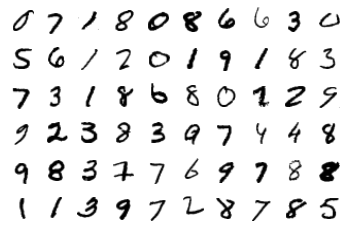

In [9]:
dataiter = iter(test_loader)
images,labels = dataiter.next()
print(labels)
figure = plt.figure()
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray_r')

## Build the neural network

In [10]:
input_size = 784
hidden_sizes = [128,64]
output_size = 1

model = nn.Sequential(
    nn.Linear(input_size,hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0],hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1],output_size),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
print(model)
optimizer = optim.SGD(model.parameters(),lr = 0.003,momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    for images,labels in train_loader:
        images = images.view(images.shape[0],-1) # flatten the image
        optimizer.zero_grad() # training pass
        output = model(images)
        labels = labels.unsqueeze(1)
        loss = criterion(output,labels)
        loss.backward() # backpropagation
        optimizer.step() # optimizes its weights here
        
print(f"\nTraining time in minutes = {(time()-time0)/60}")

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
  (5): Sigmoid()
)

Training time in minutes = 0.12083102464675903


## Testing

In [11]:
correct_outputs = 0
total_outputs = 0
y_pred = [] # predicted labels
y_true = [] # true labels
for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        true_label = labels.numpy()[i]
        if true_label == 0: # skip digit 0
            continue
        with torch.no_grad():
            logps = model(img)
        pred_label = torch.round(logps) # predict for non zero digit
        print(str(pred_label) + " " + str(true_label))
        y_pred.append(pred_label.numpy()[0][0]) # store the predicted label in a list
        y_true.append(true_label) # store the true label in a list
        

# print(f"\nModel Accuracy : {accuracy_score(y_true,y_pred)}")
# print(f"\nModel Precision : {precision_score(y_true,y_pred)}")
# print(f"\nModel Recall : {recall_score(y_true,y_pred)}")
# print(f"\nModel F1 score : {f1_score(y_true,y_pred)}")

tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]])

tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]])

tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]])

tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]])

tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]])

tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]])

tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]])

tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]])

tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]])

tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]])

tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]])

tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 1
tensor([[1.]])

tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 6
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 3
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]])

tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 3
tensor([[1.]]) 9
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 5
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 7
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 2
tensor([[1.]]) 4
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]])

tensor([[1.]]) 7
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 9
tensor([[1.]]) 3
tensor([[1.]]) 1
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 9
tensor([[1.]]) 1
tensor([[1.]]) 7
tensor([[1.]]) 1
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]]) 3
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 2
tensor([[1.]]) 8
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 4
tensor([[1.]]) 8
tensor([[1.]]) 6
tensor([[1.]]) 8
tensor([[1.]]) 5
tensor([[1.]]) 6
tensor([[1.]]) 4
tensor([[1.]]) 1
tensor([[1.]]) 5
tensor([[1.]]) 7
tensor([[1.]]) 2
tensor([[1.]]) 2
tensor([[1.]]) 9
tensor([[1.]]) 9
tensor([[1.]]) 4
tensor([[1.]]) 4
tensor([[1.]]) 3
tensor([[1.]]) 4
tensor([[1.]]) 2
tensor([[1.]]) 3
tensor([[1.]]) 7
tensor([[1.]]) 5
tensor([[1.]]) 1
tensor([[1.]]) 3
tensor([[1.]]) 8
tensor([[1.]]) 7
tensor([[1.]])

## Save the Model

In [24]:
torch.save(model,'./mnist_model.pt')